In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset= pd.read_csv('train.csv')
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
print(dataset['tweet'].iloc[0])
print(dataset['tweet'].iloc[1])
print(dataset['tweet'].iloc[2])
print(dataset['tweet'].iloc[3])
print(dataset['tweet'].iloc[4])

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
  bihday your majesty
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
 factsguide: society now    #motivation


In [ ]:
# The tweet will be processed so as to be in a format which we can easily use
def processing(tweet):
  tweet= tweet.lower()
  tweet=re.sub(r"https\S+|www\S+http\S+", '', tweet, flags=re.MULTILINE)
  tweet= re.sub(r'\@w+|\#', '', tweet)
  tweet = re.sub(r'ð','',tweet)
  tweet= re.sub(r'[^\w\s]', '', tweet)
  tweet_token= word_tokenize(tweet)
  organized__tweets= [w for w in tweet_token if not w in stop_words]
  return " ".join(organized__tweets)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset.tweet= dataset['tweet'].apply(processing)

In [ ]:
dataset= dataset.drop_duplicates('tweet')

In [ ]:
lemmatizer= WordNetLemmatizer()
def lemmatizing(data):
  tweet= [lemmatizer.lemmatize(word) for word in data]
  return data

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizing(x))

In [ ]:
print(dataset['tweet'].iloc[0])
print(dataset['tweet'].iloc[1])
print(dataset['tweet'].iloc[2])
print(dataset['tweet'].iloc[3])
print(dataset['tweet'].iloc[4])

user father dysfunctional selfish drags kids dysfunction run
user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked
bihday majesty
model love u take u time ur
factsguide society motivation


In [ ]:
dataset['label'].value_counts()

0    27352
1     1993
Name: label, dtype: int64

Data Visualisation

<Axes: xlabel='label', ylabel='count'>

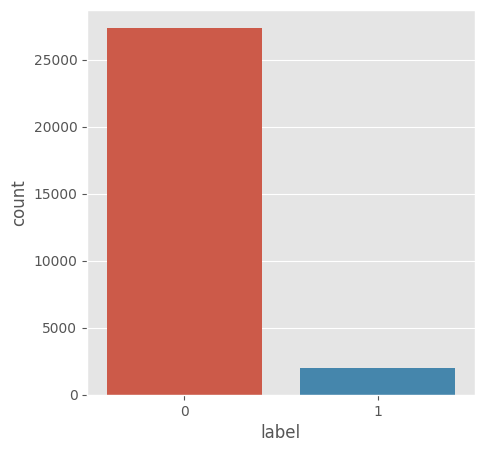

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = dataset)

Text(0.5, 1.0, 'Distribution of sentiments')

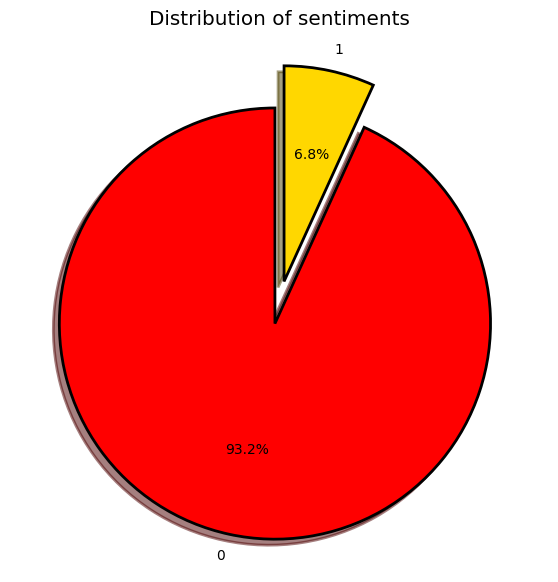

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = dataset['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
non_hate_tweets = dataset[dataset.label == 0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


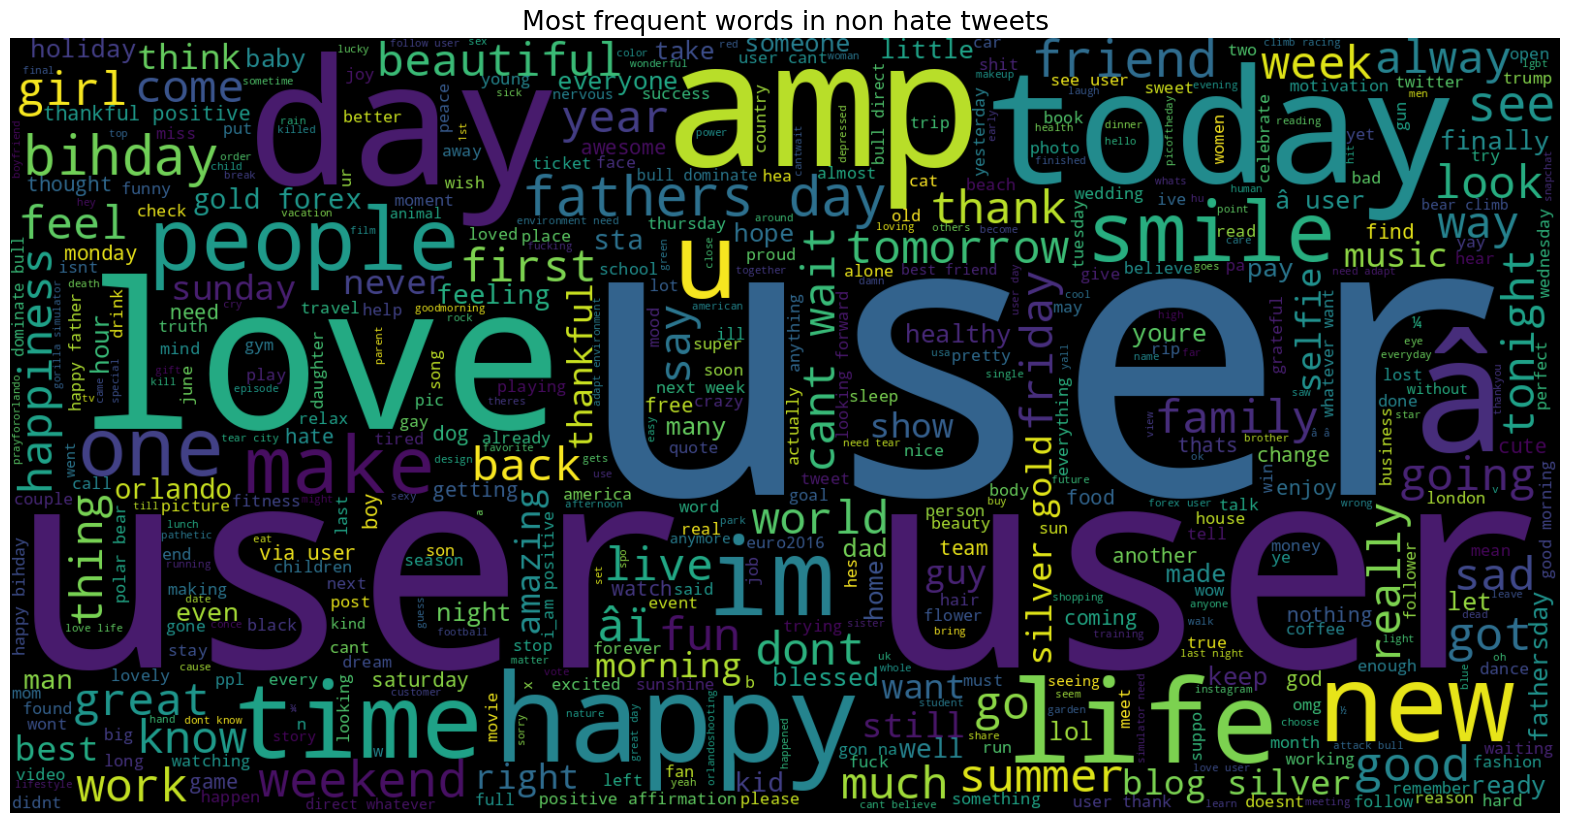

In [ ]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [ ]:
hate_tweets = dataset[dataset.label == 1]
hate_tweets.head()

,id,label,tweet
13,14,1,user cnn calls michigan middle school build wa...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,user user lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...


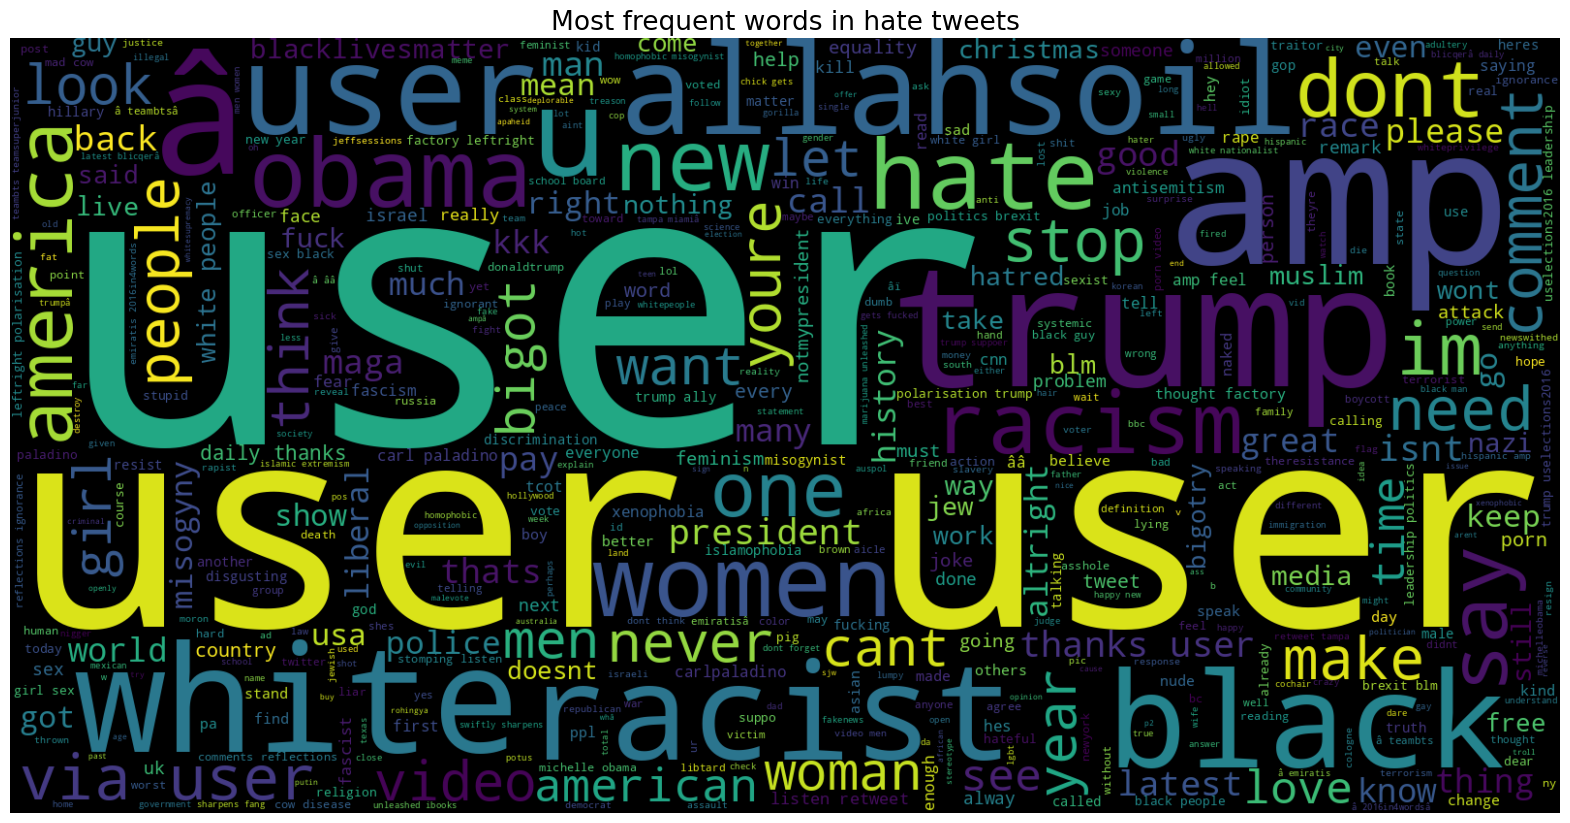

In [ ]:
text = ' '.join([word for word in hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [ ]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(dataset['tweet'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 208579

First 20 features: 
['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '01' '01 4995' '01 7900' '01 blog' '01 croatia' '01 may'
 '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny' '019'
 '019 previous']


In [ ]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(dataset['tweet'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 380305

First 20 features: 
['0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '00027 photooftheday' '00027 photooftheday music' '001' '0035' '00h30'
 '01' '01 4995' '01 4995 rustic' '01 7900' '01 7900 shopalyssas' '01 blog'
 '01 blog silver' '01 croatia' '01 croatia happy' '01 may' '01 may actual']


Model Building

In [ ]:
X = dataset['tweet']
Y = dataset['label']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (23476, 380305)
Size of y_train: (23476,)
Size of x_test:  (5869, 380305)
Size of y_test:  (5869,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 93.17%


In [ ]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[5458    0]
 [ 401   10]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5458
           1       1.00      0.02      0.05       411

    accuracy                           0.93      5869
   macro avg       0.97      0.51      0.51      5869
weighted avg       0.94      0.93      0.90      5869



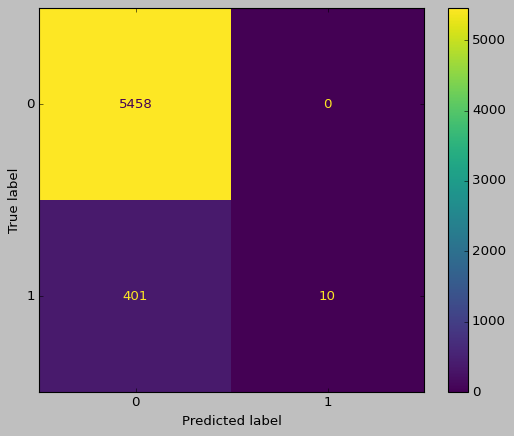

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

Hyperparameter Tuning



In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.95
Best parameters:  {'C': 100, 'solver': 'newton-cg'}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.89%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[5450    8]
 [ 292  119]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5458
           1       0.94      0.29      0.44       411

    accuracy                           0.95      5869
   macro avg       0.94      0.64      0.71      5869
weighted avg       0.95      0.95      0.94      5869

